# Ways of starting ROS 2 exploration:

- [Native on Ubuntu, Windows, ChromeOS](https://index.ros.org/doc/ros2/Installation/)
- VirtualBox ([for example provided by MathWorks](https://www.mathworks.com/support/product/robotics/ros2-vm-installation-instructions-v3.html)
- containerized (problematic starting of GUI applications)
- containerized but with VNC accessable desktop environment (this is what I will be using during this presentation)

A repo with dockerfiles and docker-compose files is available at https://github.com/AdoHaha/ros_fun.



# Using the repo container


Clone the repository: `git clone https://github.com/AdoHaha/ros_fun.git`

`cd ros_fun`

Use `docker-compose up` to start the container. 

Navigate to: http://localhost:6080/
Inside the view, in the terminal type:

`cd ~turtlebot_ws/jupyter_notebooks`
`jupyter notebook`
This will start the jupyter notebook inside the container can be accessed from your browser at
http://localhost:8888 

alternatively from the host computer type:

``` 
docker container exec -it--user ubuntu fun_ros_ros2_1  jupyter notebook --notebook-dir="./src/jupyter_notebooks"
```

and also put http://localhost:8888

### Let's start running some robots

In [1]:
import os
import subprocess

def run_lxterminal(command):
    """start independent process in lxterminal, so output is visible and
    it is not killed by interrupt in jupyter notebook"""
    os.system('lxterminal --command="{} "&'.format(command))


By putting in two terminals (though novnc view):
in one:

`ros2 run turtlesim turtlesim_node`

in second

`ros2 run turtlesim turtle_teleop_key`

you get turtle robot and a way to control it through keyboard.

I will use a helper function to run it from here

In [2]:
run_lxterminal("ros2 run turtlesim turtlesim_node")
run_lxterminal("ros2 run turtlesim turtle_teleop_key")

Obviously it is much more fun to control it from python.
To do this we need to create a publisher that publishes **twist**, that is 6 different parameters
x,y,z velocity and
yaw, pitch,roll rotational velocity

![Yaw Pitch Roll](./images/yaw-pitch-roll.png)


In [2]:
import rclpy
from rclpy.node import Node


from geometry_msgs.msg import Twist

class TurtleMover(Node):

    def __init__(self):
        super().__init__('turtle_mover')
        self.publisher_ = self.create_publisher(Twist, 'turtle1/cmd_vel', 10)


    def move_turtle(self,twist_command):
        self.publisher_.publish(twist_command)




In [3]:
rclpy.init()

In [4]:
turtle_mover = TurtleMover()


In [7]:
twist_command = Twist()

twist_command.linear.x = 1.0

turtle_mover.move_turtle(twist_command)

Using this we created our first **node** turtle_mover
and connected it to a different node turtlesim

We can see this using `rqt_graph` command in the terminal

In [8]:
run_lxterminal("rqt_graph")

In [83]:
from types import MethodType

move_front = Twist()
move_front.linear.x = 1.0
turn_right = Twist()
turn_right.angular.z =1.0


def make_shape(self):
    if hasattr(self,"n_moves"):
        self.n_moves+=1 
    else: 
        self.n_moves= 1
    if self.n_moves % 2 == 0:
        
        self.move_turtle(move_front)
    else:
        self.move_turtle(turn_right)

turtle_mover.heart_move =  MethodType(make_shape, turtle_mover) #create a new method for the node instance
turtle_mover.timer = turtle_mover.create_timer(1.0, turtle_mover.heart_move)
    

# Spinning

We need to start spining to start receiving event calls -- such as timers or more

In [84]:

rclpy.spin(turtle_mover) #start spinning the context
#

RuntimeError: Failed to publish: publisher's context is invalid, at /tmp/binarydeb/ros-dashing-rcl-0.7.9/src/rcl/publisher.c:343

In [11]:
turtle_mover.timer.cancel()

# Subscribing to topics
There is so much that you can do with robots without getting some feedback and sensory data. 

In ROS you usually do this by subscribing to topics.
With our little turtle we can access its position. Let's start by reading it



In [12]:
from turtlesim.msg import Pose

def print_sensor_info_callback(self, msg):
    print(msg)
    
turtle_mover.print_sensor_info_callback =  MethodType(print_sensor_info_callback, turtle_mover) #create a new method for the node instance
turtle_mover.subscription = turtle_mover.create_subscription(Pose,"turtle1/pose", turtle_mover.print_sensor_info_callback,10)

In [14]:
rclpy.spin(turtle_mover)

turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, lin

turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, lin

turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, linear_velocity=0.0, angular_velocity=0.0)
turtlesim.msg.Pose(x=6.7818169593811035, y=7.450705051422119, theta=2.960003137588501, lin

KeyboardInterrupt: 

### That is a lot of information
we can check how much by a ros2 tool

In [15]:
!ros2 topic hz /turtle1/pose


average rate: 62.511
	min: 0.015s max: 0.016s std dev: 0.00031s window: 64
average rate: 62.511
	min: 0.013s max: 0.019s std dev: 0.00052s window: 127
average rate: 62.501
	min: 0.010s max: 0.023s std dev: 0.00082s window: 190
^C


In [21]:
### We can use this information to make a wall avoiding robot

#turtle_mover.subscription.destroy()
turtle_mover.timer.cancel()

def wall_avoider(self, msg):

    wall_distance = 0.1
    move_command = Twist()
    move_command.linear.x = 1.0 # always ride front

    if (msg.x > 10-wall_distance 
        or msg.x< wall_distance 
        or msg.y < wall_distance 
        or msg.y > 10 - wall_distance): #we are near wall
        #print("avoiding wall")
        move_command.linear.x = 0.1 # slow down
        move_command.angular.z = 1.2 # add some rotation
    self.publisher_.publish(move_command)
    
        

        
    
    
turtle_mover.wall_avoider =  MethodType(wall_avoider, turtle_mover) #create a new method for the node instance
turtle_mover.subscription.callback =  turtle_mover.wall_avoider # change callback

In [23]:
#currentely a way to unsubscribe is a "work in progress" in ROS2 so we just pass messages to function that does nothing
def ignore_messages(msg):
    pass
turtle_mover.subscription.callback = ignore_messages

In [24]:
rclpy.spin(turtle_mover)

KeyboardInterrupt: 

# Actions

While fun,
it would make sense to abstract some behaviours and just wait for some action result - success or failure

This is what actions are for.

![action idea](https://index.ros.org/doc/ros2/_images/Action-SingleActionClient.gif)
From:https://index.ros.org/doc/ros2/Tutorials/Understanding-ROS2-Actions/

In [29]:
from turtlesim.action import RotateAbsolute
from rclpy.action import ActionClient

easiest_action = ActionClient(turtle_mover,RotateAbsolute,'turtle1/rotate_absolute')


In [91]:
angle_goal = RotateAbsolute.Goal()
angle_goal.theta = 45.0

easiest_action.send_goal_async(angle_goal)

In [ ]:
import math
def print_feedback(future):
    try:
        print("remaining radians {}".format(future.feedback.remaining))
    except:
        pass
def history_success(future):
    print("done")
    print("radial distance was {}".format(future.result().result.delta))
    
def received_task(future):
    goal_handle =  future.result()
    
    if not goal_handle.accepted:
        print("not accepted")
        return
    
    get_result_future = goal_handle.get_result_async()
    
    get_result_future.add_done_callback(history_success)
    
    
    
#ngle_goal.theta = math.pi/2
angle_goal.theta = -math.pi/2
angle_goal.theta = 0.0

goal_future = easiest_action.send_goal_async(angle_goal,feedback_callback=print_feedback)
goal_future.add_done_callback(received_task)
rclpy.spin(turtle_mover)

In [87]:
# Services

from turtlesim.srv import SetPen

service_client = turtle_mover.create_client(SetPen,"turtle1/set_pen")



In [93]:
new_pen = SetPen.Request() 

new_pen.r = 255
new_pen.width = 5 
service_client.call_async(new_pen)


turtle_mover.move_turtle(twist_command) #move to see effect

In [ ]:
# What has this to do with serious robotics?

Same type of communication is used while using "normal" robots. 

You usually look for the correct topics to subscribe
and build your robot behaviours by connecting different nodes together.

Instead of *turtlesim* let's use Turtlebot as an example ;)

In [94]:
run_lxterminal("ros2 launch turtlebot3_gazebo turtlebot3_world.launch.py")

In the same way as with the turtlesim you can send twist command to control this *real* robot.



In [95]:
!ros2 topic list

/camera/camera_info
/camera/image_raw
/clock
/cmd_vel
/imu
/joint_states
/odom
/parameter_events
/robot_description
/rosout
/scan
/tf
/tf_static
/turtle1/cmd_vel
/turtle1/color_sensor
/turtle1/pose


In [97]:
big_turtle_publisher = turtle_mover.create_publisher(Twist, 'cmd_vel', 10)

In [104]:
new_msg =  Twist()

new_msg.linear.x = 0.3

big_turtle_publisher.publish(new_msg)

In [105]:
run_lxterminal("ros2 run rviz rviz")

In [13]:
from cv_bridge import CvBridge
import cv2
from sensor_msgs.msg import CameraInfo, Image
%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display # import Image as , display
from io import BytesIO
import matplotlib as mpl


def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return IPython.display.Image(out)

def camera_image_callback(rgb_msg):
    "show the camera image on the global dh display"
    rgb_image = CvBridge().imgmsg_to_cv2(rgb_msg, desired_encoding="rgb8")

    dh.update(arr2img(rgb_image))
    
    return arr2img(rgb_image)
    

turtle_mover.image_subscription.callback = camera_image_callback


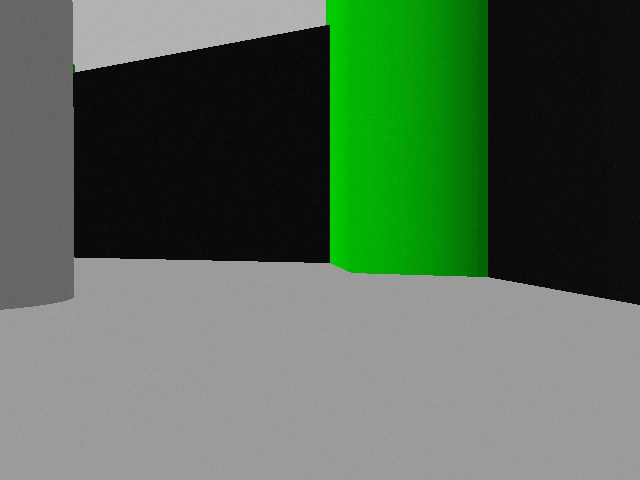

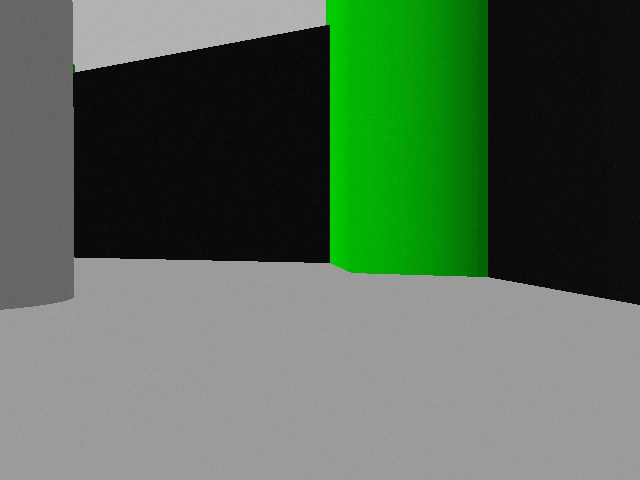

KeyboardInterrupt: 

In [17]:
dh = IPython.display.display(display_id=True)
dh.display("https://image.shutterstock.com/image-vector/example-red-square-grunge-stamp-260nw-327662909.jpg")
rclpy.spin(turtle_mover)

In [ ]:
Image._